<br>

# OCR 모델 비교 <br>
---
<br>

다양한 이미지들에 대하여 각 이미지 특성에 따라 <br>
Google OCR API, Keras-OCR, Tesseract OCR 각 모델의 성능을 평가, 분석해 봅시다.

<br>

<br>

## 특성별 OCR 분석 대상 이미지 준비 <br><br>

노이즈가 없는 텍스트 이미지 <br>
표면이 왜곡된 텍스트 이미지 <br>
불규칙 배치된 텍스트 이미지
화이트 노이즈가 있는 이미지 <br>
여러 대상이 혼재하는 이미지 <br>


<br>

In [139]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import keras_ocr

import os, glob
 
import os.path

<br>

### 이미지 불러오기

<br>

In [140]:
# 이미지 타입별로 저장된 폴더명 리스트 생성

base_dir = os.getenv('HOME') + '/aiffel/ocr_python/images'

def folder_list(base_dir):
    files = os.listdir(base_dir)
    image_types = []
    for i in files :
        if os.path.isdir(base_dir + '/' + i):
            image_types.append(i)
    return image_types

image_types = folder_list(base_dir)

In [141]:
# 이미지 타입별로 폴더 내 파일 리스트 생성

def path_list(folder_name):
    path_list = []
    path = os.getenv('HOME') + '/aiffel/ocr_python/images/' + folder_name
    file_list = os.listdir(path)
    for i in file_list:
        if os.path.isfile(path + '/' + i):
            path_list.append(path + '/' + i)
    path_list.sort()
    return path_list

# path_list() 함수 확인
path_list(image_types[0])

['/home/ssac29/aiffel/ocr_python/images/noise/noise_01.jpg',
 '/home/ssac29/aiffel/ocr_python/images/noise/noise_02.jpeg',
 '/home/ssac29/aiffel/ocr_python/images/noise/noise_03.png',
 '/home/ssac29/aiffel/ocr_python/images/noise/noise_04.jpeg']

<br>

## 노이즈 이미지에 대해 OCR 비교

<br>

In [142]:
# noise 폴더 내 이미지 불러오기

path_noise = path_list(image_types[0])
print(path_noise)

['/home/ssac29/aiffel/ocr_python/images/noise/noise_01.jpg', '/home/ssac29/aiffel/ocr_python/images/noise/noise_02.jpeg', '/home/ssac29/aiffel/ocr_python/images/noise/noise_03.png', '/home/ssac29/aiffel/ocr_python/images/noise/noise_04.jpeg']


<br>

## Google OCR API

<br>

In [143]:
# 구글 Cloud Vision API 사용 테스트 코드

def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations

    # print('Texts:')

    # chunks = texts.description

    full_text = texts[0].description    # ocr 처리된 전문
    chunks = []                         # ocr 처리된 단어들 모을 리스트
    boxes = []                          # ocr 처리된 단어의 박스 좌표 모을 리스트

    for text in texts:
        # print('\n"{}"'.format(text.description))
        chunks.append(text.description)

        vertices = [[vertex.x, vertex.y] for vertex in text.bounding_poly.vertices]
        boxes.append(vertices)
        # print('bounds: {}'.format(','.join(vertices)))
    
    boxes = np.array(boxes, dtype=np.float64)

    chunks = chunks[1:]                 # index 0 번째에 전체 단어들이 전부 들어가 있으므로 제외
    boxes = boxes[1:]                   # index 0 번째에 전체 단어들의 box 좌표가 전부 들어가 있으므로 제외

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    
    return chunks, boxes, full_text

In [144]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 위에서 정의한 OCR API 이용 함수를 호출
# detect_text({file_path_name})

chunks_list = []
boxes_list = []
full_text_list = []

for s in path_noise:
    chunks, boxes, full_text = detect_text(s)
    chunks_list.append(chunks)
    boxes_list.append(boxes)
    full_text_list.append(full_text)

-rw-rw-r-- 1 ssac29 ssac29 2337  3월 17 23:43 /home/ssac29/aiffel/ocr_python/my_google_api_key.json


In [145]:
# path_noise 리스트 내 파일이 잘 분석 되었는지 확인

num = 0

print('ocr 처리된 단어 개수 : ', len(chunks_list[num]))
print('ocr 처리된 박스 개수 : ', len(boxes_list[num]), '\n')
print(chunks_list[num], '\n')
print(boxes_list[num], '\n')
print(full_text_list[num])

ocr 처리된 단어 개수 :  184
ocr 처리된 박스 개수 :  184 

['LONDON', "LADY'S", 'STARTLING', 'EXPERIENCE', 'IN', 'REMOVING', 'WRINKLES', 'BY', 'RADIAMIC', 'PRINCIPLE.', 'Srch', 'widespread', 'interest', 'was', 'aroused', 'by', 'our', 'recent', 'interview', 'with', 'Professor', 'Nitzam', 'regarding', 'the', 'remarkable', 'results', 'obtained', 'in', 'restoring', 'a', 'youthful', 'appearance', 'to', 'wrinkled', 'isces,', 'that', 'we', 'cannot', 'possibly', 'attempt', 'to', 'reply', 'personally', 'to', 'all', 'the', 'demands', 'of', 'readers', 'as', 'to', 'where', 'the', 'radiamic', 'clay', 'can', 'be', 'fonnd.', 'It', 'is', 'certain,', 'however,', 'that', 'most', 'chemists', 'hare', 'it', 'in', 'sfeck,', 'for', 'among', 'the', 'letters', 'received', 'is', 'ore', 'irom', 'a', 'London', 'lady', 'who', 'expresses', 'the', 'greatest', 'astenishment', 'and.delight', 'at', 'having', 'seen', 'her', 'rinkles', 'of', 'many', "years'", 'standing', 'disappaar', 'a', 'if', 'by', 'magic', 'under', 'its', 'peculiar'

In [146]:
# keras_ocr.~ 쓰기 위해 prediction_groups 객체 만드는 함수

def mk_prediction_groups(chunks, boxes):
    prediction_groups = []
    chunks = chunks
    boxes = boxes
    for i in range(len(chunks)):
        prediction = (chunks[i], boxes[i])
        prediction_groups.append(prediction)
    return prediction_groups

In [147]:
# prediction_groups_google 생성

prediction_groups_google = []

for i in range(len(chunks_list)):
    prediction_group = mk_prediction_groups(chunks_list[i], boxes_list[i])
    prediction_groups_google.append(prediction_group)

print(prediction_groups_google[0])

[('LONDON', array([[ 57.,   3.],
       [196.,   1.],
       [197.,  45.],
       [ 58.,  47.]])), ("LADY'S", array([[217.,   1.],
       [344.,  -1.],
       [345.,  35.],
       [218.,  37.]])), ('STARTLING', array([[365.,   1.],
       [566.,  -2.],
       [567.,  34.],
       [366.,  37.]])), ('EXPERIENCE', array([[ 56.,  48.],
       [275.,  44.],
       [276.,  87.],
       [ 57.,  91.]])), ('IN', array([[295.,  45.],
       [336.,  44.],
       [337.,  79.],
       [296.,  80.]])), ('REMOVING', array([[366.,  44.],
       [559.,  40.],
       [560.,  78.],
       [367.,  82.]])), ('WRINKLES', array([[ 80.,  89.],
       [265.,  85.],
       [266., 127.],
       [ 81., 131.]])), ('BY', array([[288.,  89.],
       [335.,  88.],
       [336., 122.],
       [289., 123.]])), ('RADIAMIC', array([[354.,  88.],
       [537.,  84.],
       [538., 121.],
       [355., 125.]])), ('PRINCIPLE.', array([[204., 133.],
       [405., 130.],
       [406., 166.],
       [205., 169.]])), ('Srch', a

In [148]:
# 시각화를 위한 원본 이미지 불러오기 (path_noise 리스트 내에 있는 디렉토리에서)

images_google = []
for i in path_noise:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images_google.append(image)

# 이미지 잘 불러와졌는지 확인
print('리스트 내 이미지 개수 : ', len(images_google), '\n')
print(images_google[0])

리스트 내 이미지 개수 :  4 

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [255 255 255]
  [255 255 255]
  [254 254 254]]

 ...

 [[246 246 246]
  [245 245 245]
  [244 244 244]
  ...
  [245 245 245]
  [245 245 245]
  [246 246 246]]

 [[250 250 250]
  [249 249 249]
  [248 248 248]
  ...
  [249 249 249]
  [249 249 249]
  [249 249 249]]

 [[252 252 252]
  [251 251 251]
  [250 250 250]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]]


/home/ssac29/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


'\nfig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))\n\nfor idx, ax in enumerate(axs):\n    keras_ocr.tools.drawAnnotations(image=images[idx], \n                                    predictions=prediction_groups[idx][0], ax=ax)\n'

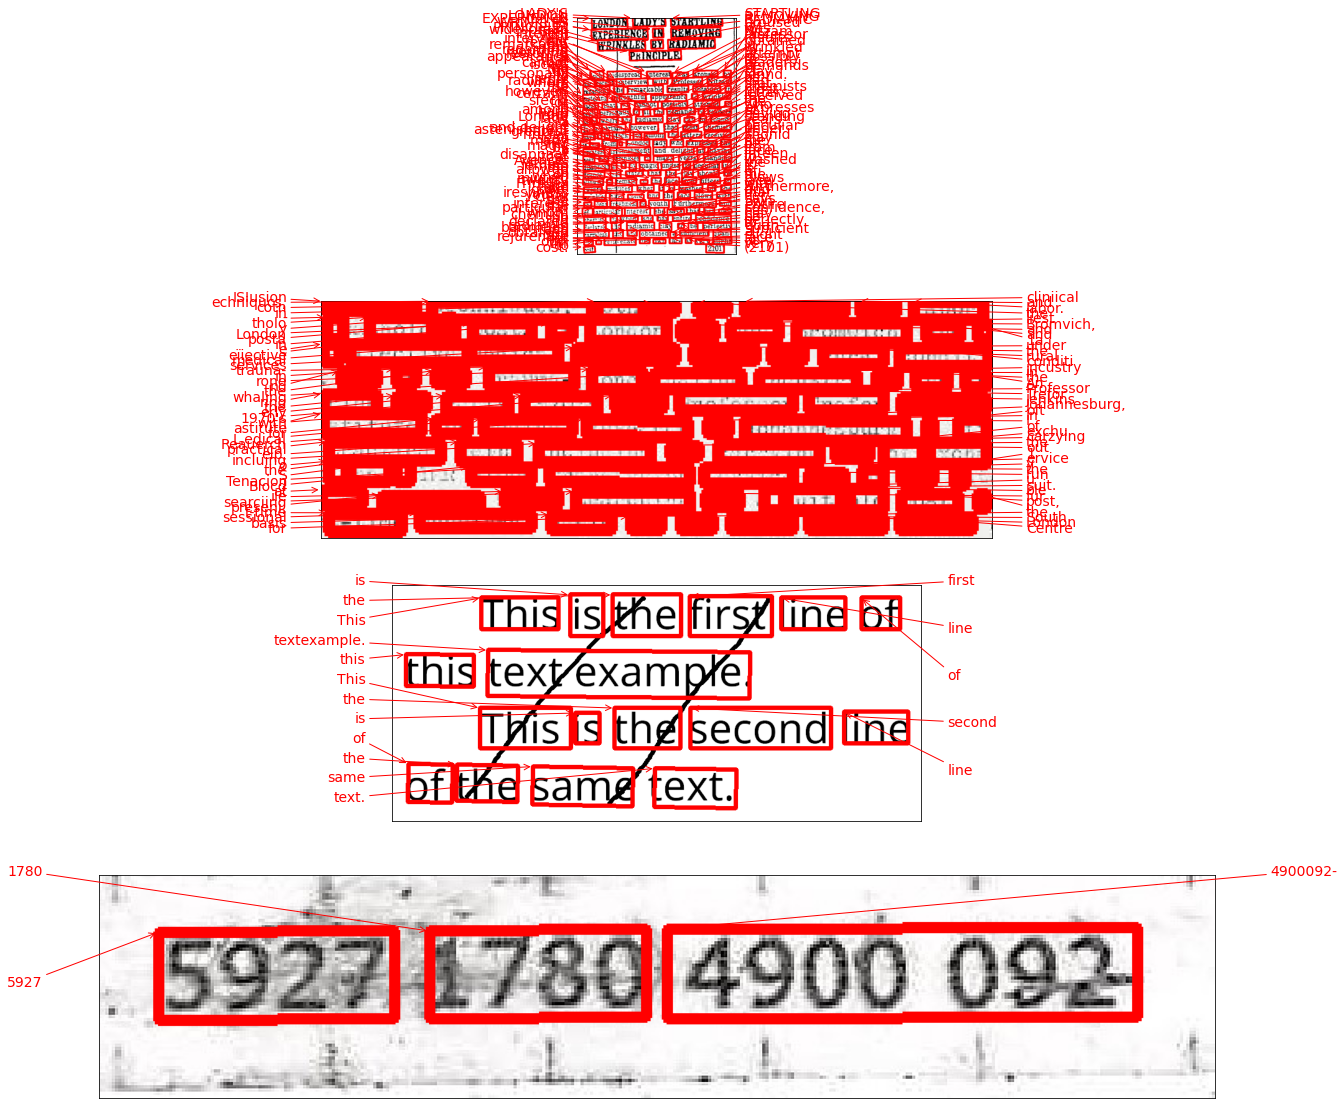

In [149]:
# Plot the predictions

fig, axs = plt.subplots(nrows=len(images_google), figsize=(20, 20))

for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_google[idx], 
                                predictions=prediction_groups_google[idx], ax=ax)

"""
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))

for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)
"""

In [ ]:
# 조각난 글자들 이미지 및 이미지 경로

"""
# top_level = max(recognized_data['level'])
index = 0
cropped_image_path_list = []
# boxes = []
for i in range(len(recognized_data['level'])):
    level = recognized_data['level'][i]

    if level == top_level:
        left = recognized_data['left'][i]
        top = recognized_data['top'][i]
        width = recognized_data['width'][i]
        height = recognized_data['height'][i]
        
        output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
        print(output_img_path)
        cropped_image = image.crop((
            left,
            top,
            left+width,
            top+height
        ))
        cropped_image.save(output_img_path)
        cropped_image_path_list.append(output_img_path)

In [150]:
# 4 점 crop 함수 작성

def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

In [151]:
#

output_path = []
for d in path_noise:
    output_dir = d + '_output'
    output_path.append(output_dir)

# print(prediction_groups_google[0][0][1])

cropped_image_paths_list = []
cropped_images_list = []

for i in range(len(images_google)):
    image = images_google[i]

    if not os.path.exists(output_path[i]):
        os.mkdir(output_path[i])

    cropped_images = []
    index = 0
    for j in range(len(prediction_groups_google[i])):
        pts = prediction_groups_google[i][j][1]
        cropped_image = four_point_transform(image, pts)
        output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
        cropped_image.save(output_img_path)
        cropped_images.append(cropped_image)
        index += 1
        
    cropped_images_list.append(cropped_images)

print(cropped_images_list[0][0])

TypeError: 'str' object is not callable

<br>

## Keras OCR <br><br>

keras-ocr 은 텐서플로우 케라스 API 를 기반으로 <br>
이미지 속 문자를 읽는 end-to-end OCR 을 할 수 있게 해줍니다. <br><br>

[(주의사항)](https://github.com/faustomorales/keras-ocr/issues/101) <br>
keras-ocr은 한글 데이터셋으로 훈련이 되어있지 않은 모델입니다. <br>
한글 텍스트의 detection은 정상적으로 진행되더라도 recognition 결과가 엉뚱하게 나올 수 있음에 주의 <br><br>


[\[공식문서\]](https://keras-ocr.readthedocs.io/en/latest/index.html) <br>

- 검출 모델로 CRAFT(Character Region Awareness for Text Detection)를 사용하고, <br>

- 인식 모델로는 앞에서 설명한 CRNN을 사용합니다.

<br>

<br>

### keras_ocr.pipeline.Pipeline() <br><br>

keras_ocr.pipeline.Pipeline() 는 인식을 위한 파이프라인을 생성 <br>

이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러오게 됩니다. <br>
검출기와 인식기를 위한 가중치 하나씩을 불러옵니다. <br><br>

참고. <br>
[keras_ocr 공식문서](https://keras-ocr.readthedocs.io/en/latest/index.html)

<br>

<br>

### keras_ocr 로 이미지 속 텍스트 인식

<br>

In [3]:
# keras_ocr 임포트
# keras_ocr 인식결과 확인을 위해 matplotlib.pylot 임포트

import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드
# (주의) 시간이 오래걸릴 수 있습니다
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/ssac29/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/ssac29/.keras-ocr/crnn_kurapan.h5


<br>

#### 이미지 불러오기 <br>

만들어둔 파이프라인의 recognize() 에 이미지를 몇 개 넣어줍니다.

<br>

In [4]:
# 테스트에 사용할 이미지 url을 모아 봅니다.
"""
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

In [11]:
# 폴더 내 파일들 경로 리스트로 불러오기

path_2 = os.getenv('HOME')+'/aiffel/ocr_python/images/'
file_list = os.listdir(path_2)

paths = []
for i in file_list:
    paths.append(path_2 + i)

print(paths)

['/home/ssac29/aiffel/ocr_python/images/mixed_06.jpg', '/home/ssac29/aiffel/ocr_python/images/mixed_03.jpg', '/home/ssac29/aiffel/ocr_python/images/paragraph_02.jpg', '/home/ssac29/aiffel/ocr_python/images/mixed_09.jpg', '/home/ssac29/aiffel/ocr_python/images/noise_03.png', '/home/ssac29/aiffel/ocr_python/images/mixed_02.jpg', '/home/ssac29/aiffel/ocr_python/images/noise_04.jpeg', '/home/ssac29/aiffel/ocr_python/images/mixed_08.jpg', '/home/ssac29/aiffel/ocr_python/images/shattered_02.png', '/home/ssac29/aiffel/ocr_python/images/mixed_04.jpg', '/home/ssac29/aiffel/ocr_python/images/shattered_03.jpg', '/home/ssac29/aiffel/ocr_python/images/shattered_04.jpg', '/home/ssac29/aiffel/ocr_python/images/paragraph_01.png', '/home/ssac29/aiffel/ocr_python/images/noise_01.jpg', '/home/ssac29/aiffel/ocr_python/images/distorted_01.jpg', '/home/ssac29/aiffel/ocr_python/images/mixed_07.jpg', '/home/ssac29/aiffel/ocr_python/images/mixed_01.jpg', '/home/ssac29/aiffel/ocr_python/images/distorted_02.jpg'

In [155]:
# 테스트에 사용할 이미지 url을 모아 봅니다.


path_01 = os.getenv('HOME')+'/aiffel/ocr_python/images/shattered_03.jpg'
path_02 = os.getenv('HOME')+'/aiffel/ocr_python/images/shattered_04.jpg'

image_urls = [path_01, path_02]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

In [156]:
print(prediction_groups[1][0])

[('lns', array([[267.,   0.],
       [325.,   0.],
       [325.,  11.],
       [267.,  11.]], dtype=float32)), ('cpe', array([[329.,   0.],
       [370.,   0.],
       [370.,  15.],
       [329.,  15.]], dtype=float32)), ('binakol', array([[557.29846  ,   2.3740928],
       [631.95544  ,   7.190674 ],
       [630.7057   ,  26.561653 ],
       [556.0487   ,  21.745071 ]], dtype=float32)), ('beefo', array([[103.25055  ,   6.3648944],
       [160.73123  ,   9.471958 ],
       [159.76547  ,  27.338673 ],
       [102.28479  ,  24.23161  ]], dtype=float32)), ('bowl', array([[635.0945  ,   8.688417],
       [689.3645  ,  10.238989],
       [688.8678  ,  27.624796],
       [634.5978  ,  26.074224]], dtype=float32)), ('white', array([[269.26788 ,  14.837737],
       [325.68298 ,  17.290565],
       [324.849   ,  36.471695],
       [268.4339  ,  34.018867]], dtype=float32)), ('rices', array([[329.39386 ,  18.092922],
       [377.84515 ,  21.32301 ],
       [376.6018  ,  39.97345 ],
       [328.1

<br>

#### keras_ocr 로 인식 <br>

사용이 매우 간단 <br>
내부적으로 recognize() 는 검출기와 인식기를 두고, <br>
검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤, <br>
인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 합니다. <br><br>


#### pyplot 으로 시각화

<br>

2
[('sundeivs', array([[462.5 ,   0.  ],
       [555.  ,   0.  ],
       [555.  ,  13.75],
       [462.5 ,  13.75]], dtype=float32)), ('ds', array([[555.  ,   0.  ],
       [628.75,   0.  ],
       [628.75,  10.  ],
       [555.  ,  10.  ]], dtype=float32)), ('ts', array([[542.0216 ,  90.40987],
       [725.84784,  74.18991],
       [735.51404, 183.74142],
       [551.68787, 199.96138]], dtype=float32)), ('awards', array([[319.92902, 106.14605],
       [385.8621 ,  97.15517],
       [389.02637, 120.36003],
       [323.0933 , 129.3509 ]], dtype=float32)), ('tony', array([[281.30774, 111.71155],
       [324.69235, 106.28848],
       [327.57697, 129.3654 ],
       [284.19235, 134.78847]], dtype=float32)), ('winneri', array([[202.59998, 124.45001],
       [268.57498, 115.02501],
       [271.75   , 137.25   ],
       [205.775  , 146.67502]], dtype=float32)), ('7', array([[271.25, 117.5 ],
       [281.25, 117.5 ],
       [281.25, 132.5 ],
       [271.25, 132.5 ]], dtype=float32)), ('revival'

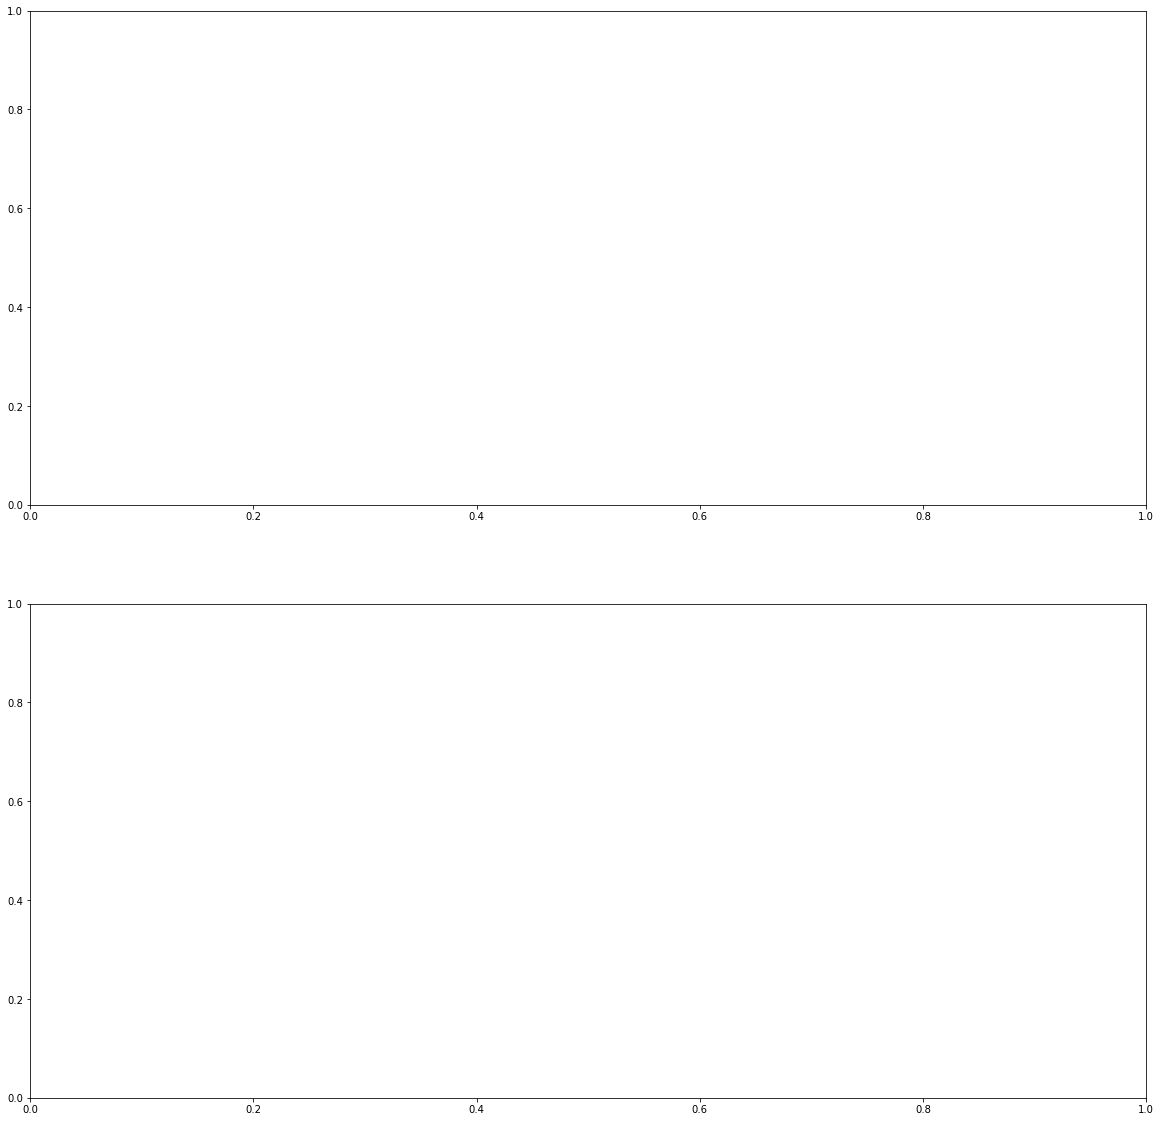

In [170]:
print(len(images))

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))

print(prediction_groups[0][0])

[<AxesSubplot:> <AxesSubplot:>]
/home/ssac29/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


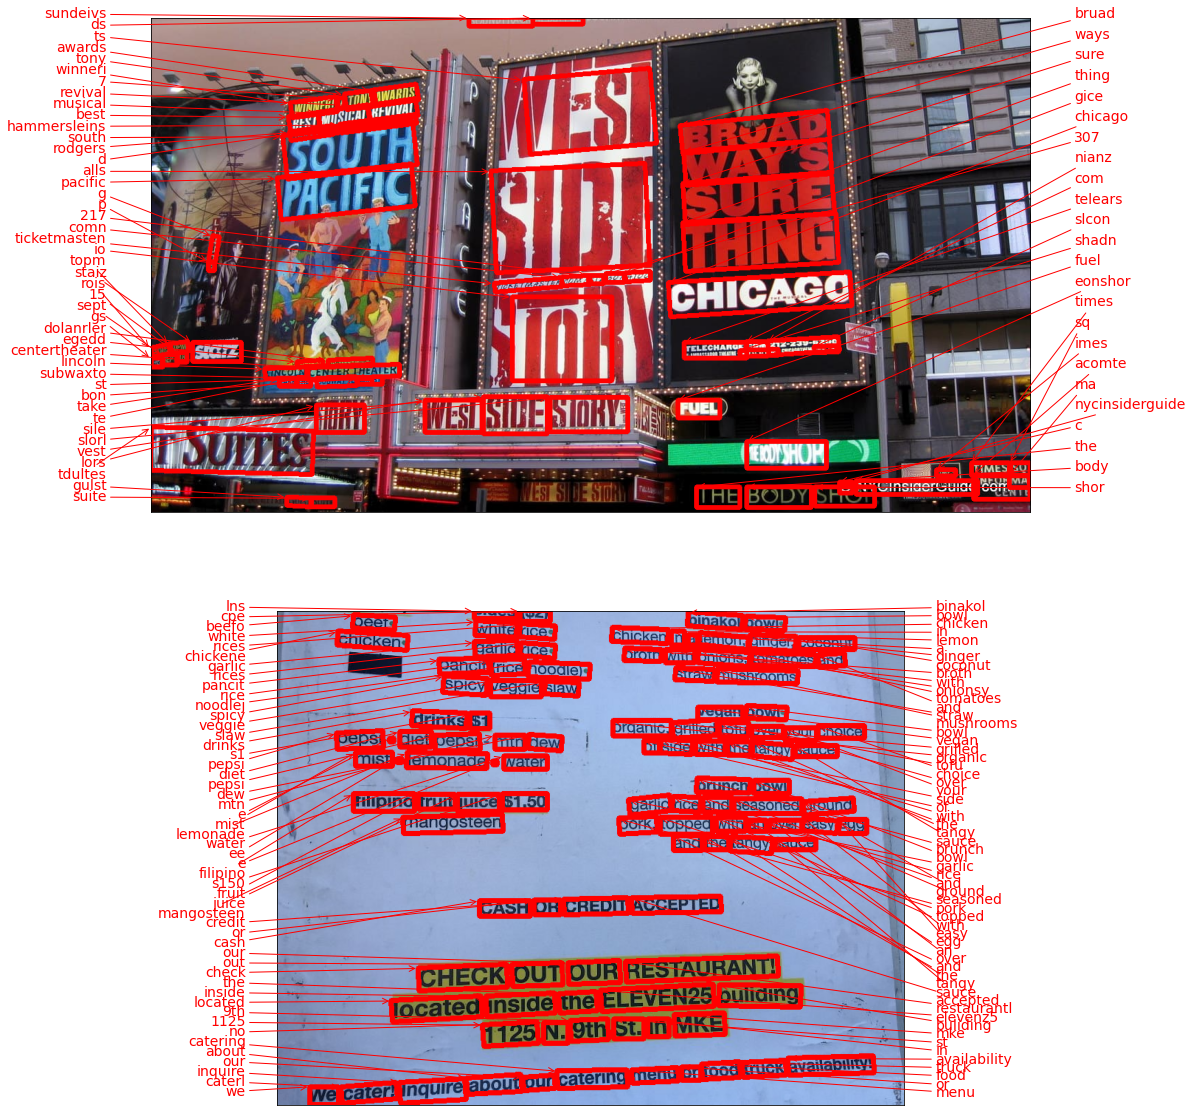

In [147]:
# Plot the predictions

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))

for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

<br>

## Tesseract OCR

<br>

<br>

#### 테서랙트로 문자 검출하고 이미지 자르기 (detection) <br><br>

테서랙트를 사용하면 한 번에 이미지 내의 문자 검출과 인식을 할 수 있습니다. <br>
우리는 OCR이 이뤄지는 전체과정을 직접 거쳐보기 위해 검출을 먼저 해 봅시다. <br><br><br>


__crop_word_regions() 함수__ <br><br>


여러분이 선택한 테스트 이미지를 받아서 문자 검출을 진행한 후, <br>
검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴하는 함수 <br>

- pytesseract.image_to_data() 를 사용 <br>
- 파이썬에서 편하게 사용하기 위해서 pytesseract 의 Output 을 사용해서 결과값의 형식을 딕셔너리(DICT) 형식으로 설정 <br>
- 이렇게 인식된 결과는 바운딩 박스의 left, top, width, height 정보를 가지게 됨 <br>
- 바운딩 박스를 사용해 이미지의 문자 영역들을 파이썬 PIL(pillow) 또는 opencv 라이브러리를 사용해 잘라(crop) <br>
- cropped_image_path_list에 담아 리턴 <br><br>

(주의사항) <br>

위 코드에서 lang='kor' 로 바꾸면 에러가 발생 <br>
[테서랙트 언어팩](http://blog.daum.net/rayolla/1141) 을 설치해야 정상동작 <br>
```
sudo apt install tesseract-ocr-kor
```

<br>

In [47]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
import cv2

In [141]:

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    boxes = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)

            # y 좌표가 Opencv 처럼 위에서 아래로 향하는지 확인 !
            # box 순서 [좌하단, 우하단, 우상단, 좌상단]
            box = [[left, top], [left+width, top], [left+width, top+height],[left, top+width]]
            boxes.append(box)

            index += 1
    return cropped_image_path_list, boxes

In [ ]:
# Tesseact 분석

"""
image_path_test = os.getenv('HOME')+'/aiffel/ocr_python/images/noise_03.png'
image = Image.open(image_path_test)

recognized_data = pytesseract.image_to_data(
    image, lang='eng',    # 한국어라면 lang='kor'
    config=custom_oem_psm_config,
    output_type=Output.DICT
)

top_level = max(recognized_data['level'])
index = 0
cropped_image_path_list = []
for i in range(len(recognized_data['level'])):
    level = recognized_data['level'][i]

    if level == top_level:
        left = recognized_data['left'][i]
        top = recognized_data['top'][i]
        width = recognized_data['width'][i]
        height = recognized_data['height'][i]
        
        output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
        print(output_img_path)
        cropped_image = image.crop((
            left,
            top,
            left+width,
            top+height
        ))
        cropped_image.save(output_img_path)
        cropped_image_path_list.append(output_img_path)
        index += 1

In [142]:
# Tesseract 로 text 인식하여 크롭한 이미지 조각 저장

path_01 = os.getenv('HOME')+'/aiffel/ocr_python/images/shattered_03.jpg'
path_02 = os.getenv('HOME')+'/aiffel/ocr_python/images/shattered_04.jpg'
output_dir_01 = '/output/shattered_03.jpg'
output_dir_02 = '/output/shattered_04.jpg'

image_urls = [path_01, path_02]

work_dir = os.getenv('HOME')+'/aiffel/ocr_python/images'
output_dir = work_dir + output_dir_02
img_file_path = path_02   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

try:
    if not(os.path.isdir(output_dir)):
        os.makedirs(os.path.join(output_dir))
except OSError as e:
    if e.errno != errno.EEXIST:
        print("Failed to create directory!!!!!")
        raise


cropped_image_path_list, boxes = crop_word_regions(img_file_path, output_dir)

/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0000.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0001.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0002.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0003.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0004.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0005.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0006.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0007.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0008.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0009.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0010.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0011.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0012.png
/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0013.png
/home/

<br>

### 테서랙트로 잘린 이미지에서 단어 인식 <br><br>

문자 인식 <br>
인식된 결과가 실제 이미지와 맞는지 확인 <br><br>


__image_to_string() 함수__ <br>

검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결과값으로 나오는 함수 작성 <br>

<br>

In [43]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    output_text = []
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        output_text.append(recognized_data['text'])

    return output_text
    print("Done")

In [145]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.

output = recognize_images(cropped_image_path_list)

print(len(output))
print(len(boxes))

114
114


In [ ]:
# 폴더 내 파일들 경로 리스트로 불러오기

def mk_paths(dir_path):
    file_list = os.listdir(dir_path)
    file_list.sort()

    paths = []
    for i in file_list:
        paths.append(dir_path + i)

    return paths

/home/ssac29/aiffel/ocr_python/images/output/shattered_04.jpg/0005.png
/home/ssac29/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/ssac29/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ssac29/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


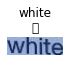

white

[[269, 17], [323, 17], [323, 34], [269, 71]]


In [146]:
# 텍스트 청크 이미지 시각화


path_3 = os.getenv('HOME')+'/aiffel/ocr_python/images/output/shattered_04.jpg/'
paths = mk_paths(path_3)
print(paths[5])

text_chunk_img = cv2.imread(paths[5])

plt.figure(figsize=(1,1))

plt.imshow(cv2.cvtColor(text_chunk_img, cv2.COLOR_BGR2RGB))
plt.title(output[5])
plt.axis("off")
plt.show()

# text_chunk_img = cv2.imread()


print(output[5])
print(boxes[5])

<br>

## 결과 비교 <br><br>

### Google OCR API <br>

셋 중 가장 번역 정확도가 높았습니다. <br>
특수 기호도 포함하여 번역 가능하여 광범위한 OCR 번역에 이용 가능해 보입니다. <br>
단점은 유료. <br><br>


### Keras-OCR <br>

무료로 사용 가능한 OCR 모델치고 정확도가 높습니다. <br>
특수기호는 번역하지 못합니다. <br>
단점은 모델이 커서 불러오는데 많은 메모리를 사용합니다. <br><br>


### Tesseract OCR <br>

무료로 사용 가능한 오픈소스 OCR 번역 라이브러리입니다. <br>
알파벳을 잘못 인식하여 오번역 되는 경우가 종종 있습니다. <br>
서비스를 위한 사용에는 무리가 있어보입니다.

<br>